# **CHAPTER 2. Average Nucleotide Identity analysis**

Import all the modules needed

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import Entrez, SeqIO

For `ANI` analysis we need `.fasta` files of complete genome records of analysed strains. Let's use the function from `01_pangenome.ipynb` journal! 

In [ ]:
def get_sequences(email, file_path, output_dir, format, extension):
    Entrez.email = email

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Read accession numbers from file
    with open(file_path, "r") as file:
        accession_numbers = file.read().split()

    def download_sequence(accession):
        """Fetches a single sequence from NCBI and saves it as a FASTA file."""
        try:
            handle = Entrez.efetch(
                db="nucleotide", id=accession, rettype=format, retmode="text"
            )
            records = list(SeqIO.parse(handle, "fasta"))  # Use parse() instead of read()
            handle.close()

            if records:
                output_path = os.path.join(output_dir, f"{accession.split('.')[0]}.{extension}")
                SeqIO.write(records, output_path, "fasta")
                print(f"Downloaded: {accession}")
            else:
                print(f"No CDS found for {accession}")

        except Exception as e:
            print(f"Failed to download {accession}: {e}")

    # Download sequences for each accession number
    for accession in accession_numbers:
        download_sequence(accession)

    print("All downloads completed.")

In [ ]:
email = "ivpopov@donstu.ru"
accession_numbers = "pangenome/data/accession_numbers.txt"

Create directories to store the data

In [2]:
%%bash

mkdir ANI/
mkdir ANI/data/

Download genomes

In [ ]:
get_sequences(email,
              accession_numbers,
              "ANI/data",
              format = "fasta",
              extension = "fa")

Create input files for `FastANI`

In [3]:
! ls ANI/data/*.fa > ANI/querylist.txt && ls ANI/data/*.fa > ANI/reflist.txt

Run `FastANI`!

In [ ]:
! fastANI --ql ANI/querylist.txt --rl ANI/reflist.txt -o ANI/fastani.out --matrix

Rename entries in the `FastANI` output (yeah... manually...)

In [ ]:
# Load the contents of the file
file_path = 'ANI/fastani.out'

with open(file_path, 'r') as file:
    file_content = file.read()

# Define the mapping for renaming the files
rename_map = {
    "data/NZ_CP014485.fa": "NZ_CP014485 S. albidoflavus SM254",
    "data/NC_020990.fa": "NC_020990 S. albidoflavus",
    "data/NZ_CP133227.fa": "NZ_CP133227 S. albidoflavus RKJM-0023",
    "data/NZ_CP113228.fa": "NZ_CP113228 S. albidoflavus J1074_D14",
    "data/NZ_CP064783.fa": "NZ_CP064783 S. albidoflavus W68",
    "data/NZ_CP170353.fa": "NZ_CP170353 S. albidoflavus S20",
    "data/NZ_CP128384.fa": "NZ_CP128384 S. albidoflavus MGMM6",
    "data/NZ_CP152102.fa": "NZ_CP152102 S. albidoflavus SC-3",
    "data/NZ_CP109238.fa": "NZ_CP109238 S. albidoflavus NBC_01664",
    "data/NZ_CP059254.fa": "NZ_CP059254 S. albidoflavus J1074/R2",
    "data/NZ_CP108451.fa": "NZ_CP108451 S. albidoflavus NBC_01270",
    "data/NZ_CP109173.fa": "NZ_CP109173 S. albidoflavus NBC_01722",
    "data/NZ_CP108450.fa": "NZ_CP108450 S. albidoflavus NBC_01271",
    "data/NZ_CP108379.fa": "NZ_CP108379 S. albidoflavus NBC_01331",
    "data/NZ_CP140156.fa": "NZ_CP140156 S. albidoflavus ATCC 23899",
    "data/NZ_CP108647.fa": "NZ_CP108647 S. albidoflavus NBC_01110",
    "data/NZ_CP109235.fa": "NZ_CP109235 S. albidoflavus NBC_01665",
    "data/NZ_CP109270.fa": "NZ_CP109270 S. albidoflavus NBC_01640",
    "data/NZ_CP109243.fa": "NZ_CP109243 S. albidoflavus NBC_01661",
    "data/NZ_CP109281.fa": "NZ_CP109281 S. albidoflavus NBC_01627",
    "data/NZ_CP109226.fa": "NZ_CP109226 S. albidoflavus NBC_01671",
    "data/NZ_CP109224.fa": "NZ_CP109224 S. albidoflavus NBC_01673",
    "data/NZ_CP109594.fa": "NZ_CP109594 S. albidoflavus NBC_01675",
    "data/NZ_CP109294.fa": "NZ_CP109294 S. albidoflavus NBC_01621",
    "data/NZ_CP109570.fa": "NZ_CP109570 S. albidoflavus NBC_01374",
    "data/NZ_CP108610.fa": "NZ_CP108610 S. albidoflavus NBC_01170",
    "data/NZ_CP109088.fa": "NZ_CP109088 S. albidoflavus NBC_01790",
    "data/NZ_CP109085.fa": "NZ_CP109085 S. albidoflavus NBC_01791",
    "data/NZ_CP109203.fa": "NZ_CP109203 S. albidoflavus NBC_01692",
    "data/NZ_CP109142.fa": "NZ_CP109142 S. albidoflavus NBC_01747",
    "data/NZ_CP079112.fa": "NZ_CP079112 S. albidoflavus LGO-A16",
    "data/NZ_CP079113.fa": "NZ_CP079113 S. albidoflavus LGO-A23",
    "data/NZ_OX371412.fa": "NZ_OX371412 S. albidoflavus CCOS 2040 isolate Stup19_F108",
    "data/NZ_CP109299.fa": "NZ_CP109299 S. albidoflavus NBC_01616"
}

# Replace the names in the file content
for old_name, new_name in rename_map.items():
    file_content = file_content.replace(old_name, new_name)

# Save the updated content back to the file
with open(file_path, 'w') as file:
    file.write(file_content)

Visualize `ANI` results as pair-wise heatmap (using the same samples order from the phylogenomic tree)!

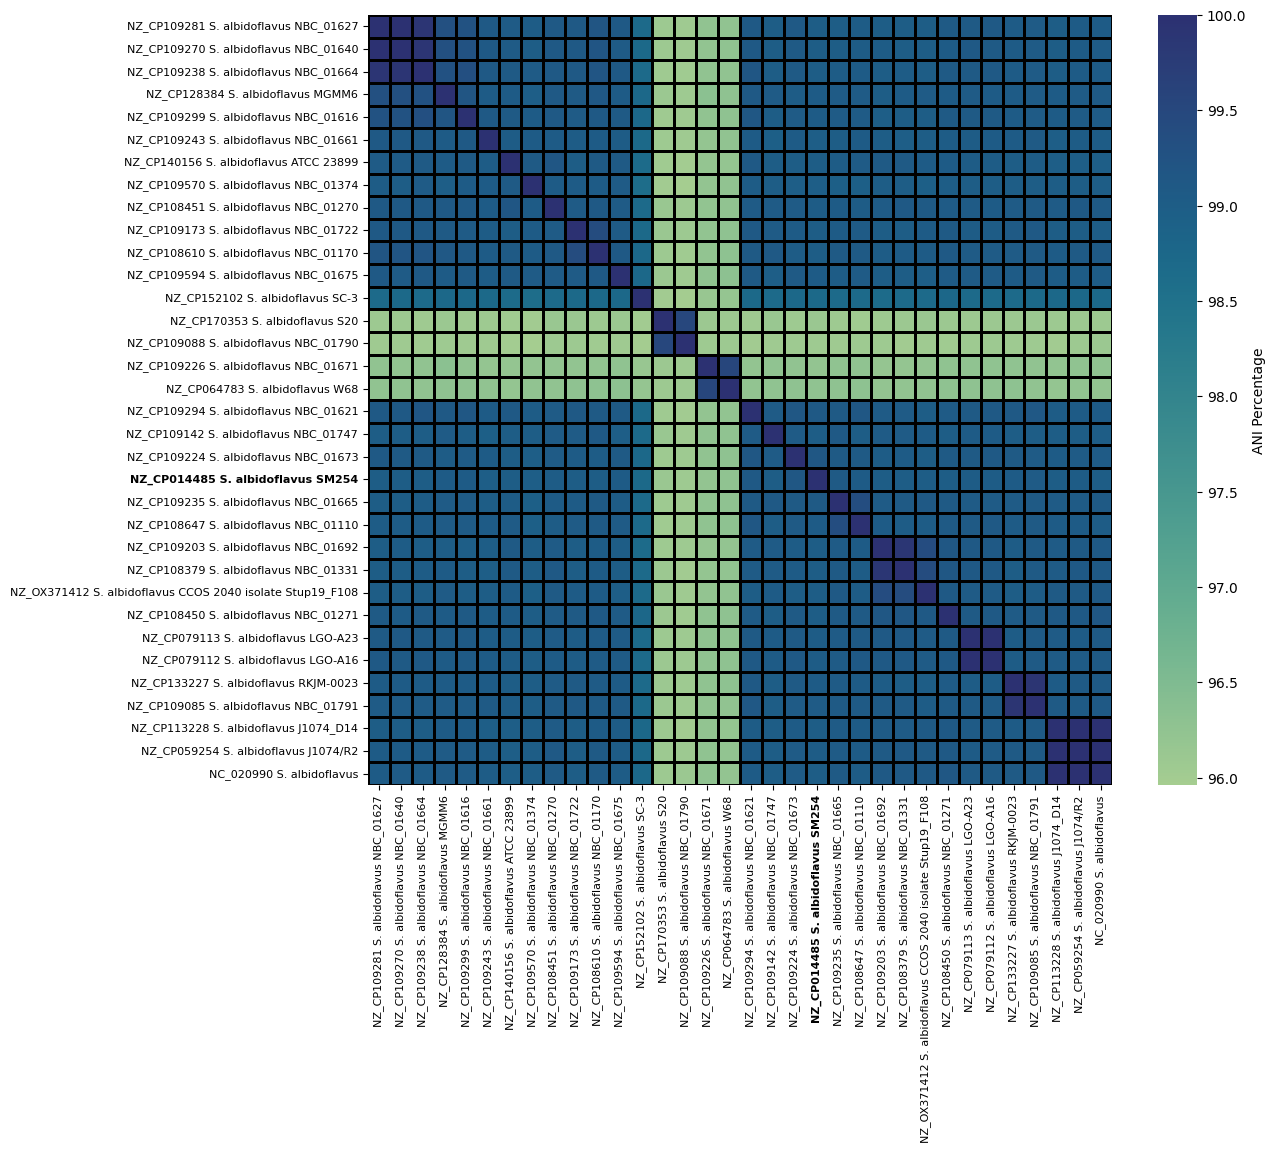

In [ ]:
# Load the FastANI output file
file_path = "ANI/fastani.out"
with open(file_path, 'r') as file:
    content = file.readlines()

# Extracting the necessary data
data = []
for line in content:
    parts = line.strip().split('\t')
    genome1 = parts[0].replace('ANI/', '')
    genome2 = parts[1].replace('ANI/', '')
    ani_value = float(parts[2])
    data.append([genome1, genome2, ani_value])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Genome1', 'Genome2', 'ANI'])

# Create a symmetric ANI matrix by averaging ANI(A, B) and ANI(B, A)
df_reversed = df.rename(columns={'Genome1': 'Genome2', 'Genome2': 'Genome1'})  # Swap columns
df_combined = pd.concat([df, df_reversed])  # Merge original and reversed
df_avg = df_combined.groupby(['Genome1', 'Genome2']).ANI.mean().reset_index()  # Average values


# Define the desired order
genome_order = [
    "NZ_CP109281 S. albidoflavus NBC_01627",
    "NZ_CP109270 S. albidoflavus NBC_01640",
    "NZ_CP109238 S. albidoflavus NBC_01664",
    "NZ_CP128384 S. albidoflavus MGMM6",
    "NZ_CP109299 S. albidoflavus NBC_01616",
    "NZ_CP109243 S. albidoflavus NBC_01661",
    "NZ_CP140156 S. albidoflavus ATCC 23899",
    "NZ_CP109570 S. albidoflavus NBC_01374",
    "NZ_CP108451 S. albidoflavus NBC_01270",
    "NZ_CP109173 S. albidoflavus NBC_01722",
    "NZ_CP108610 S. albidoflavus NBC_01170",
    "NZ_CP109594 S. albidoflavus NBC_01675",
    "NZ_CP152102 S. albidoflavus SC-3",
    "NZ_CP170353 S. albidoflavus S20",
    "NZ_CP109088 S. albidoflavus NBC_01790",
    "NZ_CP109226 S. albidoflavus NBC_01671",
    "NZ_CP064783 S. albidoflavus W68",
    "NZ_CP109294 S. albidoflavus NBC_01621",
    "NZ_CP109142 S. albidoflavus NBC_01747",
    "NZ_CP109224 S. albidoflavus NBC_01673",
    "NZ_CP014485 S. albidoflavus SM254",
    "NZ_CP109235 S. albidoflavus NBC_01665",
    "NZ_CP108647 S. albidoflavus NBC_01110",
    "NZ_CP109203 S. albidoflavus NBC_01692",
    "NZ_CP108379 S. albidoflavus NBC_01331",
    "NZ_OX371412 S. albidoflavus CCOS 2040 isolate Stup19_F108",
    "NZ_CP108450 S. albidoflavus NBC_01271",
    "NZ_CP079113 S. albidoflavus LGO-A23",
    "NZ_CP079112 S. albidoflavus LGO-A16",
    "NZ_CP133227 S. albidoflavus RKJM-0023",
    "NZ_CP109085 S. albidoflavus NBC_01791",
    "NZ_CP113228 S. albidoflavus J1074_D14",
    "NZ_CP059254 S. albidoflavus J1074/R2",
    "NC_020990 S. albidoflavus"
]

# Convert columns to categorical with the specified order
df_avg["Genome1"] = pd.Categorical(df_avg["Genome1"], categories=genome_order, ordered=True)
df_avg["Genome2"] = pd.Categorical(df_avg["Genome2"], categories=genome_order, ordered=True)

# Sort by Genome1 first, then Genome2
df_avg = df_avg.sort_values(by=["Genome1", "Genome2"]).reset_index(drop=True)

# Create a symmetric pivot table
pivot_table = df_avg.pivot(index='Genome1', columns='Genome2', values='ANI')

# Sort for better visualization
pivot_table = pivot_table.sort_index(axis=0).sort_index(axis=1)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_table,
                      annot=False,
                      cmap='crest',
                      cbar_kws={'label': 'ANI Percentage'},
                      vmin=float(df_avg['ANI'].min()),
                      vmax=float(df_avg['ANI'].max()),
                      linewidths=1,  # Adjust line thickness
                      linecolor='black')  # Set outline color)

# Customize x-tick labels
target_label = "NZ_CP014485 S. albidoflavus SM254"
for label in heatmap.get_xticklabels():
    if label.get_text() == target_label:
        label.set_fontweight('bold')

# Customize y-tick labels similarly if needed
for label in heatmap.get_yticklabels():
     if label.get_text() == target_label:
         label.set_fontweight('bold')

plt.xticks(rotation=90, fontsize=8)
#plt.xticks(rotation=90) 
plt.yticks(rotation=0, fontsize=8)
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('imgs/fastANI_heatmap.png', dpi=600, bbox_inches='tight')

Perfect! And now make a subset heatmap with strains from `SM254` clade!

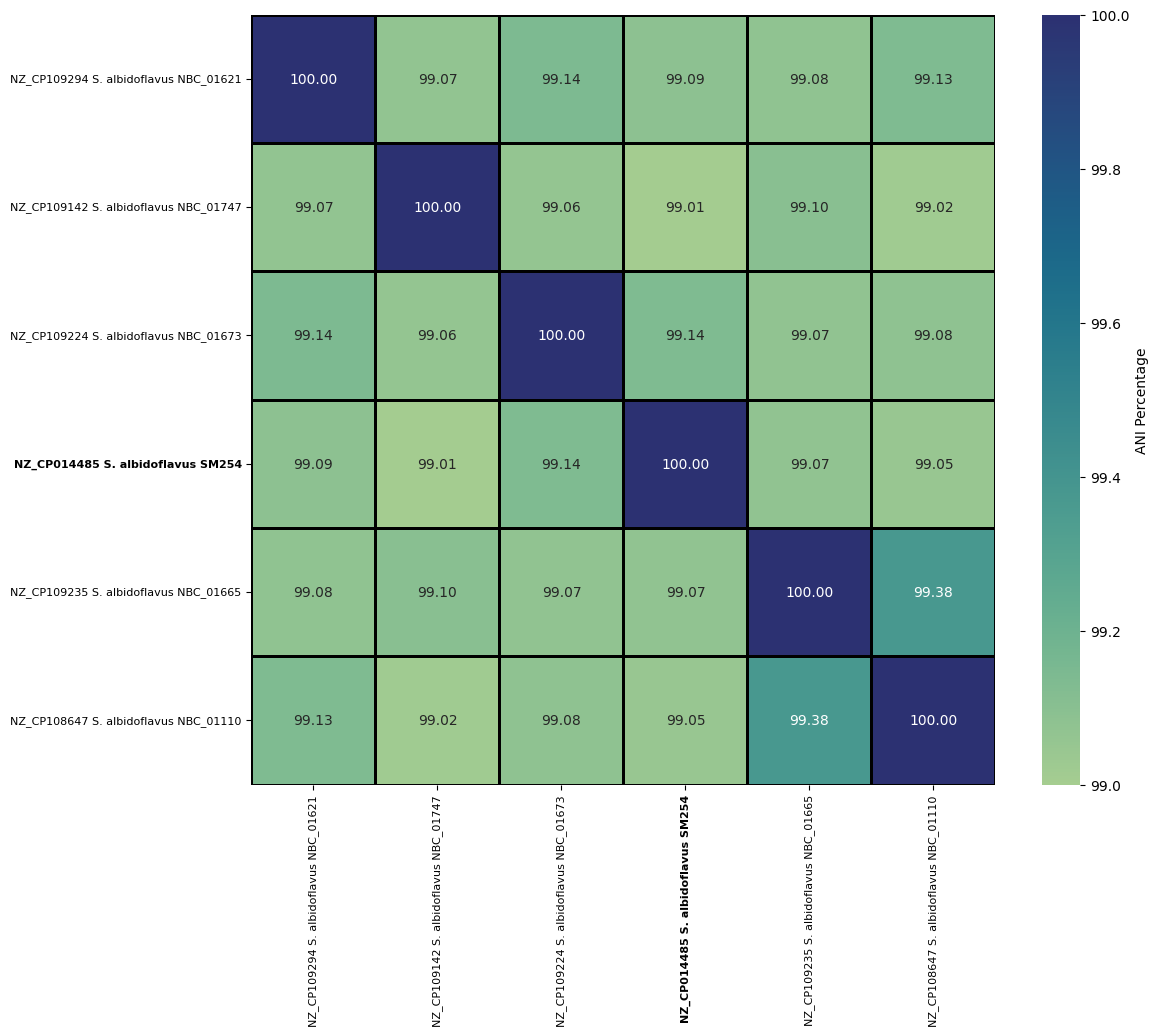

In [33]:
# Define the genomes of interest
selected_genomes = [
    "NZ_CP109294 S. albidoflavus NBC_01621",
    "NZ_CP109142 S. albidoflavus NBC_01747",
    "NZ_CP109224 S. albidoflavus NBC_01673",
    "NZ_CP014485 S. albidoflavus SM254",
    "NZ_CP109235 S. albidoflavus NBC_01665",
    "NZ_CP108647 S. albidoflavus NBC_01110"
]

# Extract the 6x6 ANI submatrix
subset_df = pivot_table.loc[selected_genomes, selected_genomes]

# Plot the heatmap
plt.figure(figsize=(12, 10))
subset_heatmap = sns.heatmap(subset_df,
                              annot=True,  # Show ANI values
                              fmt=".2f",
                              cmap='crest',
                              cbar_kws={
                                  'label': 'ANI Percentage',
                                  #'shrink': 0.8,
                                  #'pad': 0.25
                                  },
                              vmin=99,
                              vmax=100,
                              linewidths=1,
                              linecolor='black')

# Move y-tick labels to the right
#subset_heatmap.yaxis.tick_right()

# Customize x-tick labels
target_label = "NZ_CP014485 S. albidoflavus SM254"
for label in subset_heatmap.get_xticklabels():
    if label.get_text() == target_label:
        label.set_fontweight('bold')

# Customize y-tick labels similarly if needed
for label in subset_heatmap.get_yticklabels():
     if label.get_text() == target_label:
         label.set_fontweight('bold')

# Rotate ticks and adjust fonts
plt.xticks(rotation=90,
           #ha='right',
           fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.xlabel(None)
plt.ylabel(None)

# Save to file
plt.savefig('imgs/fastANI_subset_heatmap.png', dpi=600, bbox_inches='tight')

Then launch PowerPoint to make a merged figure (yeah, I know... -_-)